Repository: UCI Machine Learning Repository

Dataset Link:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Nmae= Rishika Kumari
roll no =23053649
class=ADLAB CSE35

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    roc_curve,
    auc,
    recall_score
)

In [12]:
import pandas as pd

columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

data = pd.read_csv(
    r"C:\Users\KIIT0001\Downloads\breast+cancer+wisconsin+diagnostic\wdbc.data",
    header=None,
    names=columns
)

data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)            # Sensitivity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    return acc, recall, specificity, f1, roc_auc, fpr, tpr

In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_results = evaluate_model(dt, X_test, y_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_results = evaluate_model(knn, X_test, y_test)

In [17]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

svm_results = evaluate_model(svm, X_test, y_test)

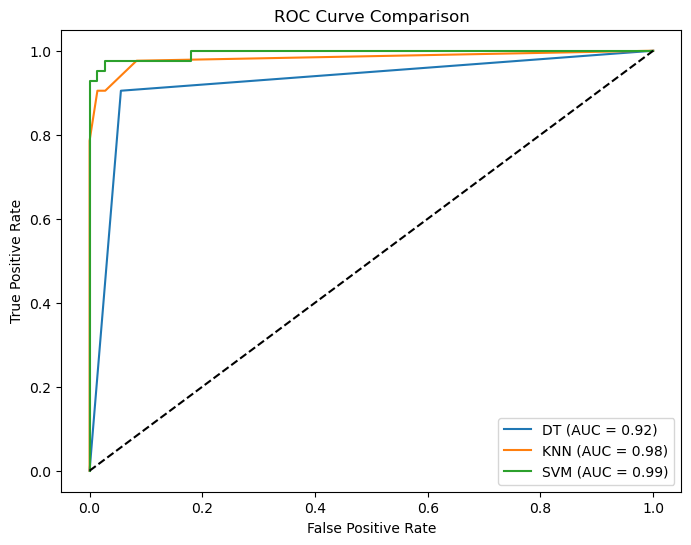

In [18]:
plt.figure(figsize=(8,6))

plt.plot(dt_results[5], dt_results[6], label=f"DT (AUC = {dt_results[4]:.2f})")
plt.plot(knn_results[5], knn_results[6], label=f"KNN (AUC = {knn_results[4]:.2f})")
plt.plot(svm_results[5], svm_results[6], label=f"SVM (AUC = {svm_results[4]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [19]:
results_df = pd.DataFrame({
    "Algorithm": ["Decision Tree", "KNN", "SVM"],
    "Accuracy": [dt_results[0], knn_results[0], svm_results[0]],
    "Sensitivity (Recall)": [dt_results[1], knn_results[1], svm_results[1]],
    "Specificity": [dt_results[2], knn_results[2], svm_results[2]],
    "F1-Score": [dt_results[3], knn_results[3], svm_results[3]],
    "AUC": [dt_results[4], knn_results[4], svm_results[4]]
})

results_df

,Algorithm,Accuracy,Sensitivity (Recall),Specificity,F1-Score,AUC
0,Decision Tree,0.929825,0.904762,0.944444,0.904762,0.924603
1,KNN,0.956140,0.904762,0.986111,0.938272,0.982308
2,SVM,0.973684,0.928571,1.000000,0.962963,0.994709


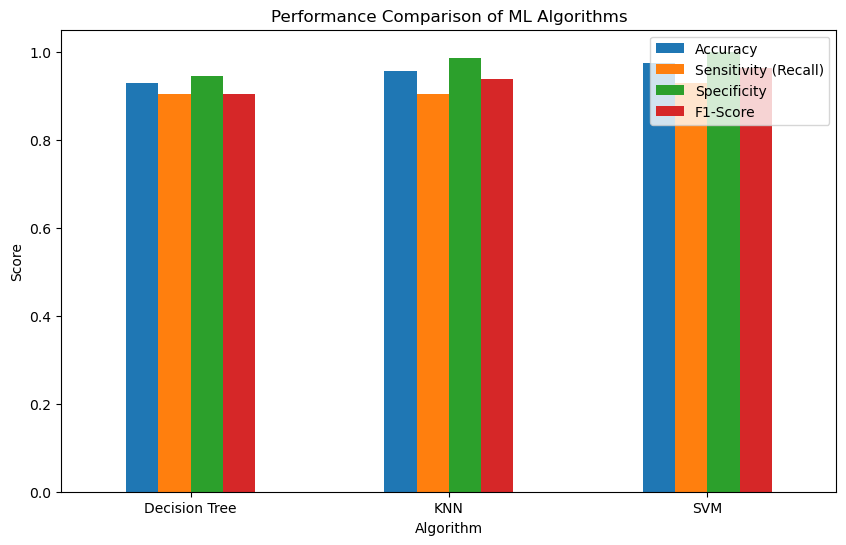

In [20]:
results_df.set_index("Algorithm")[["Accuracy", "Sensitivity (Recall)", "Specificity", "F1-Score"]].plot(
    kind="bar", figsize=(10,6)
)
plt.title("Performance Comparison of ML Algorithms")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score

def print_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)   # Recall
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    print("====================================")
    print(f"Model : {model_name}")
    print(f"Accuracy      : {accuracy:.4f}")
    print(f"Sensitivity   : {sensitivity:.4f}")
    print(f"Specificity   : {specificity:.4f}")
    print(f"F1-Score      : {f1:.4f}")
    print(f"AUC           : {auc_score:.4f}")
    print("====================================\n")

In [23]:
print_metrics(dt, X_test, y_test, "Decision Tree")
print_metrics(knn, X_test, y_test, "KNN")
print_metrics(svm, X_test, y_test, "SVM")

Model : Decision Tree
Accuracy      : 0.9298
Sensitivity   : 0.9048
Specificity   : 0.9444
F1-Score      : 0.9048
AUC           : 0.9246

Model : KNN
Accuracy      : 0.9561
Sensitivity   : 0.9048
Specificity   : 0.9861
F1-Score      : 0.9383
AUC           : 0.9823

Model : SVM
Accuracy      : 0.9737
Sensitivity   : 0.9286
Specificity   : 1.0000
F1-Score      : 0.9630
AUC           : 0.9947



In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [25]:
def print_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    tn, fp, fn, tp = cm.ravel()

    print("====================================")
    print(f"Confusion Matrix for {model_name}")
    print(cm)
    print(f"True Negative (TN) : {tn}")
    print(f"False Positive (FP): {fp}")
    print(f"False Negative (FN): {fn}")
    print(f"True Positive (TP) : {tp}")
    print("====================================\n")

In [26]:
print_confusion_matrix(dt, X_test, y_test, "Decision Tree")
print_confusion_matrix(knn, X_test, y_test, "KNN")
print_confusion_matrix(svm, X_test, y_test, "SVM")

Confusion Matrix for Decision Tree
[[68  4]
 [ 4 38]]
True Negative (TN) : 68
False Positive (FP): 4
False Negative (FN): 4
True Positive (TP) : 38

Confusion Matrix for KNN
[[71  1]
 [ 4 38]]
True Negative (TN) : 71
False Positive (FP): 1
False Negative (FN): 4
True Positive (TP) : 38

Confusion Matrix for SVM
[[72  0]
 [ 3 39]]
True Negative (TN) : 72
False Positive (FP): 0
False Negative (FN): 3
True Positive (TP) : 39



In [28]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Benign", "Malignant"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

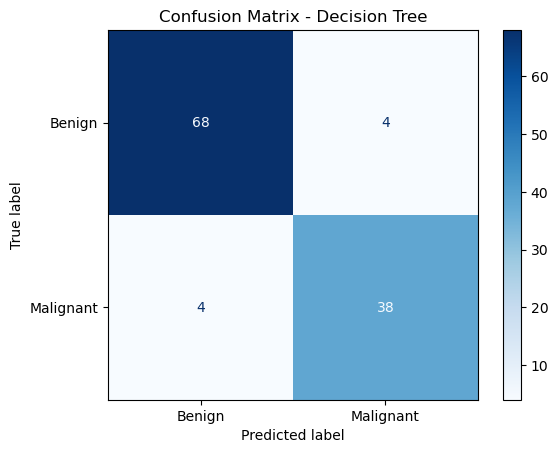

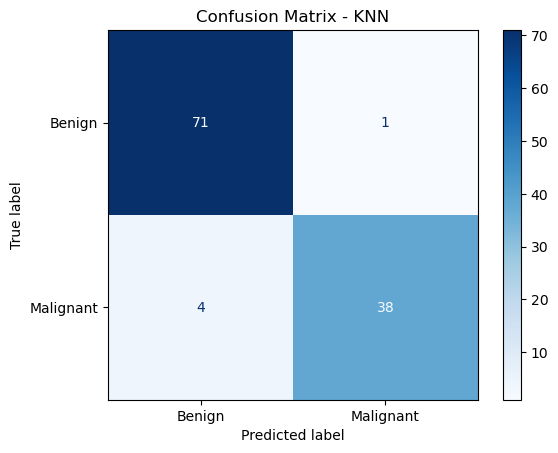

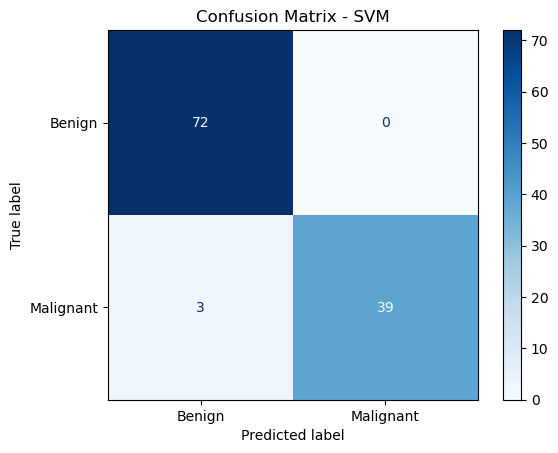

In [30]:
plot_confusion_matrix(dt, X_test, y_test, "Decision Tree")
plot_confusion_matrix(knn, X_test, y_test, "KNN")
plot_confusion_matrix(svm, X_test, y_test, "SVM")